# 키움증권 OpenAPI+ 사용 예시

In [2]:
import platform

assert platform.architecture()[0] == '32bit'

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import logging

In [7]:
logging.basicConfig(
  format='%(asctime)s [%(levelname)s] %(message)s - %(filename)s:%(lineno)d',
  level=logging.DEBUG)

In [8]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## 1. 엔트리포인트 객체 생성

In [9]:
from koapy import KiwoomOpenApiPlusEntrypoint

In [10]:
entrypoint = KiwoomOpenApiPlusEntrypoint()

2023-04-24 16:53:26,820 [DEBUG] Testing if client is ready... - KiwoomOpenApiPlusEntrypoint.py:45
2023-04-24 16:53:36,847 [DEBUG] Client is not ready - KiwoomOpenApiPlusEntrypoint.py:47
2023-04-24 16:53:36,848 [DEBUG] Creating a new server... - KiwoomOpenApiPlusEntrypoint.py:48


주요한 기능들은 해당 엔트리포인트의 멤버함수로써 제공된다.

예를 들어 아래와 같이 서버 접속 이전에도 실행 가능한 아래 함수를 활용하면 OpenAPI 가 정상적으로 로드되었는지 간접적으로 확인 가능하다.

In [11]:
module_path = entrypoint.GetAPIModulePath()

In [12]:
module_path

'C:\\OpenAPI'

## 2. 서버 접속

In [13]:
entrypoint.EnsureConnected()

True

자동 로그인 설정이 되어있는 경우 로그인이 자동으로 처리되며, 그렇지 않은 경우에는 수동으로 아이디, 비밀번호 등 로그인 정보를 입력해 처리해주어야 한다.

만약에 함수 인자로 `credentials` 정보를 주는 경우 `pywinauto` 를 활용하여 자동으로 로그인 처리를 실행한다. 앞서 언급한 키움증권에서 기본으로 제공하는 자동 로그인이 아니라 기존에 수동으로 처리하던 과정을 매크로 형태로 자동으로 처리하는 방식이다. 참고로 `pywinauto` 사용을 위해서는 **관리자 권한**이 필요하다.

In [14]:
credentials = {
    'user_id': 'id',
    'user_password': 'password',
    'cert_password': 'password',
    'is_simulation': True,
    'account_passwords': {
        '0000000000' : '0000',
    }
}

In [15]:
entrypoint.EnsureConnected(credentials)

True

참고로 여기서는 이미 로그인이 되어있는 상황이므로 위의 함수가 추가적인 로그인처리를 진행하지는 않게 된다.

## 3. 기본 함수 실행

다시 한번 기본 함수를 통해 접속상태를 확인해보자. 아래 값이 1 인 경우 정상 접속 상태이다. 접속되어 있지 않은 경우라면 0을 반환한다.

In [16]:
entrypoint.GetConnectState()

1

이후 예시들에서 사용하기 위해 삼성전자의 코드를 확인한다.

In [17]:
codes = entrypoint.GetCodeListByMarketAsList('0')
names = [entrypoint.GetMasterCodeName(code) for code in codes]

In [18]:
codes_by_name = dict(zip(names, codes))

위에서 `GetCodeListByMarketAsList()` 함수는 기존의 `GetCodeListByMarket()` 함수 호출시 나오는 문자열 형태의 결과를 편의를 위해 리스트 형태로 변환해서 제공한다.

In [19]:
code = samsung_code = codes_by_name['삼성전자']

In [20]:
code

'005930'

## 4. TR 요청 예시

### 상위 함수 사용 예시

몇가지 자주 쓰이는 TR 들에 대해서는 요청 및 결과 이벤트 처리까지 완료해서 결과물만 반환하는 상위함수를 제공하고 있다.

In [21]:
info = entrypoint.GetStockBasicInfoAsDict(code) # opt10001

In [22]:
info

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.06',
 '연중최고': '+66600',
 '연중최저': '-54500',
 '시가총액': '3892298',
 '시가총액비중': '',
 '외인소진률': '+51.65',
 '대용가': '52560',
 'PER': '8.09',
 'EPS': '8057',
 'ROE': '17.1',
 'PBR': '1.28',
 'EV': '3.45',
 'BPS': '50817',
 '매출액': '3022314',
 '영업이익': '433766',
 '당기순이익': '556541',
 '250최고': '+68800',
 '250최저': '-51800',
 '시가': '-65300',
 '고가': '65700',
 '저가': '-64800',
 '상한가': '+85400',
 '하한가': '-46000',
 '기준가': '65700',
 '예상체결가': '65200',
 '예상체결수량': '85',
 '250최고가일': '20220523',
 '250최고가대비율': '-5.23',
 '250최저가일': '20220930',
 '250최저가대비율': '+25.87',
 '현재가': '-65200',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.76',
 '거래량': '12892761',
 '거래대비': '+122.34',
 '액면가단위': '원',
 '유통주식': '4526429',
 '유통비율': '75.8'}

In [23]:
data = entrypoint.GetDailyStockDataAsDataFrame(code) # opt10081

2023-04-24 17:07:16,126 [DEBUG] Received 600 records from 2023-04-24 00:00:00 to 2020-11-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:07:16,412 [DEBUG] Received 600 records from 2020-11-19 00:00:00 to 2018-06-15 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:07:16,707 [DEBUG] Received 600 records from 2018-06-14 00:00:00 to 2015-12-30 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:07:17,005 [DEBUG] Received 600 records from 2015-12-29 00:00:00 to 2013-07-23 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:07:17,299 [DEBUG] Received 600 records from 2013-07-22 00:00:00 to 2011-02-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:07:34,139 [DEBUG] Received 600 records from 2011-02-23 00:00:00 to 2008-10-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [24]:
data

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,005930,65200,12892761,840604,20230424,65300,65700,64800,,,,,,,
1,,65700,10538622,691721,20230421,65800,65900,65400,,,,,,,
2,,65300,9501169,618181,20230420,65100,65300,64600,,,,,,,
3,,65500,10255985,672185,20230419,65500,65800,65300,,,,,,,
4,,65600,14802060,966927,20230418,65900,66000,64800,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,,8010,4970,1,19850109,8240,8240,7950,,,,,,,
10100,,8300,12930,4,19850108,8400,8400,8300,,,,,,,
10101,,8410,11810,3,19850107,8400,8500,8390,,,,,,,
10102,,8390,1660,0,19850105,8400,8440,8390,,,,,,,


데이터가 최대한 있는 그대로 (주로 문자열 형태로) 반환되기 때문에 필요하다면 타입 변환을 거쳐 사용한다.

In [25]:
dates = pd.to_datetime(data['일자'], format='%Y%m%d')
closes = pd.to_numeric(data['현재가'])

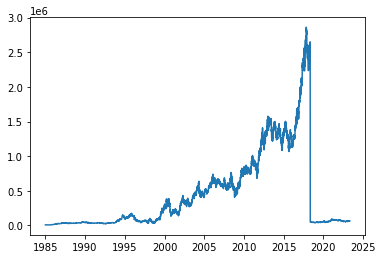

In [26]:
plt.plot(dates, closes)

주가 데이터에서 수정주가가 필요한 경우에는 `adjusted_price=True` 파라미터를 설정해 호출한다.

In [27]:
data_adjusted = entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2023-04-24 17:43:19,205 [DEBUG] Received 600 records from 2023-04-24 00:00:00 to 2020-11-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:43:19,497 [DEBUG] Received 600 records from 2020-11-19 00:00:00 to 2018-06-15 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:43:19,801 [DEBUG] Received 600 records from 2018-06-14 00:00:00 to 2015-12-30 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:43:20,093 [DEBUG] Received 600 records from 2015-12-29 00:00:00 to 2013-07-23 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:43:20,389 [DEBUG] Received 600 records from 2013-07-22 00:00:00 to 2011-02-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 17:43:37,183 [DEBUG] Received 600 records from 2011-02-23 00:00:00 to 2008-10-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [28]:
dates = pd.to_datetime(data_adjusted['일자'], format='%Y%m%d')
closes = pd.to_numeric(data_adjusted['현재가'])

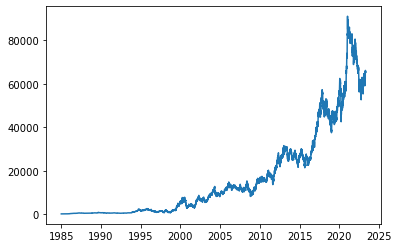

In [29]:
plt.plot(dates, closes)

### 하위 함수 사용 예시

만약에 필요한 TR 에 대한 편의함수가 제공되지 않는 경우라면 아래처럼 직접 TR 요청에 필요한 입력값을 설정해 요청하고, 이후 스트림 형태로 들어오는 이벤트 또한 직접 처리해주는 방식으로 사용할 수 있다.

In [30]:
rqname = '주식기본정보요청'
trcode = 'opt10001'
screen_no = '0001' # 화면번호, 0000을 제외한 4자리 숫자 임의로 지정, None 의 경우 내부적으로 화면번호 자동할당
inputs = {'종목코드': code}

In [31]:
output = {}

In [32]:
logging.info('Requesting data for request name: %s', rqname)
for event in entrypoint.TransactionCall(rqname, trcode, screen_no, inputs):
    logging.info('Got event for request: %s', rqname)
    names = event.single_data.names
    values = event.single_data.values
    for name, value in zip(names, values):
        output[name] = value

In [33]:
output

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.06',
 '연중최고': '+66600',
 '연중최저': '-54500',
 '시가총액': '3892298',
 '시가총액비중': '',
 '외인소진률': '+51.65',
 '대용가': '52560',
 'PER': '8.09',
 'EPS': '8057',
 'ROE': '17.1',
 'PBR': '1.28',
 'EV': '3.45',
 'BPS': '50817',
 '매출액': '3022314',
 '영업이익': '433766',
 '당기순이익': '556541',
 '250최고': '+68800',
 '250최저': '-51800',
 '시가': '-65300',
 '고가': '65700',
 '저가': '-64800',
 '상한가': '+85400',
 '하한가': '-46000',
 '기준가': '65700',
 '예상체결가': '-65100',
 '예상체결수량': '2475',
 '250최고가일': '20220523',
 '250최고가대비율': '-5.23',
 '250최저가일': '20220930',
 '250최저가대비율': '+25.87',
 '현재가': '-65200',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.76',
 '거래량': '12892761',
 '거래대비': '+122.34',
 '액면가단위': '원',
 '유통주식': '4526429',
 '유통비율': '75.8'}

위의 코드에서 `TransactionCall()` 함수의 경우 반환되는 스트림의 `event` 객체는 `ListenResponse` 타입의 `gRPC` 메시지 형태로 반환된다.

In [34]:
from pprint import PrettyPrinter
from google.protobuf.json_format import MessageToDict

pp = PrettyPrinter()

def pprint_event(Event):
    pp.pprint(MessageToDict(event, preserving_proto_field_name=True))

In [35]:
pprint_event(event)

{'arguments': [{'string_value': '0001'},
               {'string_value': '주식기본정보요청'},
               {'string_value': 'opt10001'},
               {'string_value': ''},
               {'string_value': '0'}],
 'name': 'OnReceiveTrData',
 'single_data': {'names': ['종목코드',
                           '종목명',
                           '결산월',
                           '액면가',
                           '자본금',
                           '상장주식',
                           '신용비율',
                           '연중최고',
                           '연중최저',
                           '시가총액',
                           '시가총액비중',
                           '외인소진률',
                           '대용가',
                           'PER',
                           'EPS',
                           'ROE',
                           'PBR',
                           'EV',
                           'BPS',
                           '매출액',
                           '영업이익',
                           '당기순이익',
    

해당 메시지의 형태는
https://github.com/elbakramer/koapy/blob/master/koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto
파일의 내용, 구체적으로 아래와 같은 메시지의 정의 부분을 참고하기 바란다.

```c#
message ListenResponse {
    string name = 1;
    repeated Argument arguments = 2;
    SingleData single_data = 3;
    MultiData multi_data = 4;
}
```

각 TR 에 따라 싱글데이터/멀티데이터가 선택적으로 설정되어 반환되는데, 그러한 입력/출력과 관련된 정보들은[KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램을 활용하거나 아니면 아래처럼 `KiwoomOpenApiPlusTrInfo` 를 통해 프로그램 내에서 확인할 수 있다.

In [36]:
from koapy import KiwoomOpenApiPlusTrInfo

In [37]:
tr_info = KiwoomOpenApiPlusTrInfo.get_trinfo_by_code('opt10001')

In [38]:
tr_info.inputs

[Field('종목코드', 0, 6, 9001)]

In [39]:
tr_info.single_outputs

[Field('종목코드', 0, 20, 389),
 Field('종목명', 20, 50, 302),
 Field('결산월', 40, 20, 315),
 Field('액면가', 60, 20, 310),
 Field('자본금', 80, 20, 309),
 Field('상장주식', 100, 20, 312),
 Field('신용비율', 120, 20, 329),
 Field('연중최고', 140, 20, 1006),
 Field('연중최저', 160, 20, 1009),
 Field('시가총액', 180, 20, 311),
 Field('시가총액비중', 200, 20, 336),
 Field('외인소진률', 220, 20, 314),
 Field('대용가', 240, 20, 308),
 Field('PER', 260, 20, 1600),
 Field('EPS', 280, 20, 1604),
 Field('ROE', 300, 20, 1630),
 Field('PBR', 320, 20, 1601),
 Field('EV', 340, 20, 1608),
 Field('BPS', 360, 20, 1605),
 Field('매출액', 380, 20, 1610),
 Field('영업이익', 400, 20, 1611),
 Field('당기순이익', 420, 20, 1614),
 Field('250최고', 440, 20, 1000),
 Field('250최저', 460, 20, 1003),
 Field('시가', 480, 20, 16),
 Field('고가', 500, 20, 17),
 Field('저가', 520, 20, 18),
 Field('상한가', 540, 20, 305),
 Field('하한가', 560, 20, 306),
 Field('기준가', 580, 20, 307),
 Field('예상체결가', 600, 20, 10023),
 Field('예상체결수량', 620, 20, 10024),
 Field('250최고가일', 640, 20, 1001),
 Field('250